In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [15]:
df = pd.read_csv("F:\\Power-BI\\Data sets\\SuperMarket Analysis.csv")

In [16]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [18]:
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [19]:
print(df.duplicated().sum())

0


In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [30]:
df["Year"] = df['Date'].dt.year
df["Month"] = df["Date"].dt.month_name()
df["Month_number"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [32]:
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.hour

In [33]:
#Sort DataFrame by date
df = df.sort_values(by="Date")

In [38]:
print("Data cleaned Successfully")
df.head()

Data cleaned Successfully


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Month_number,Day,Hour
856,770-42-8960,Cairo,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31:00,Cash,168.96,4.761905,8.448,6.3,2019,January,1,1,19
567,651-88-7328,Alex,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55:00,Cash,591.66,4.761905,29.583,7.7,2019,January,1,1,13
245,530-90-9855,Alex,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47:00,Cash,380.72,4.761905,19.036,5.7,2019,January,1,1,14
696,182-52-7000,Alex,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26:00,Ewallet,108.16,4.761905,5.408,6.9,2019,January,1,1,20
523,133-14-7229,Giza,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43:00,Cash,125.74,4.761905,6.287,5.0,2019,January,1,1,11


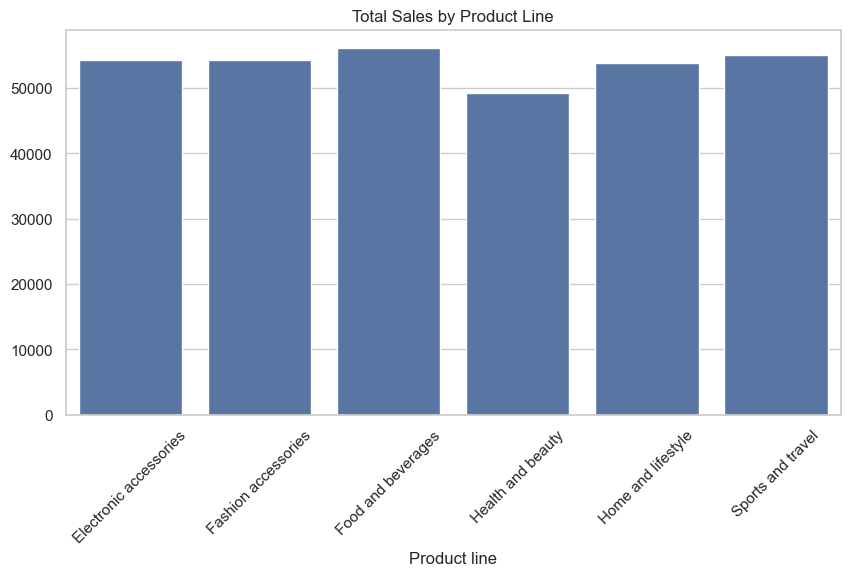

In [43]:
# EXPLORATORY DATA ANALYSIS (EDA)

# --- Total Sales by Product Line ---
plt.figure(figsize=(10,5))
sns.barplot(x=df.groupby("Product line")["Sales"].sum().index,
            y=df.groupby("Product line")["Sales"].sum().values)
plt.title("Total Sales by Product Line")
plt.xticks(rotation=45)
plt.show()

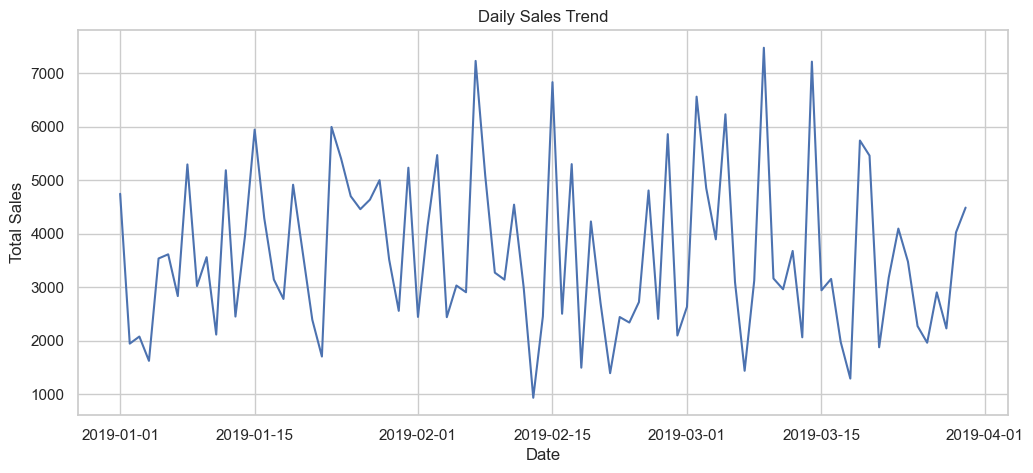

In [44]:
# --- Sales Over Time ---
plt.figure(figsize=(12,5))
daily_sales = df.groupby("Date")["Sales"].sum()
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

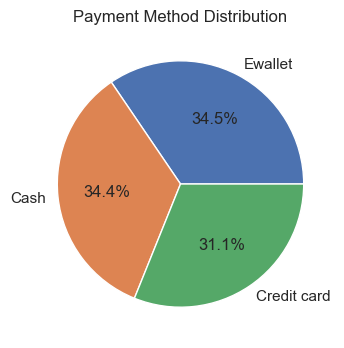

In [45]:
# --- Payment Method Distribution ---
plt.figure(figsize=(6,4))
df["Payment"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

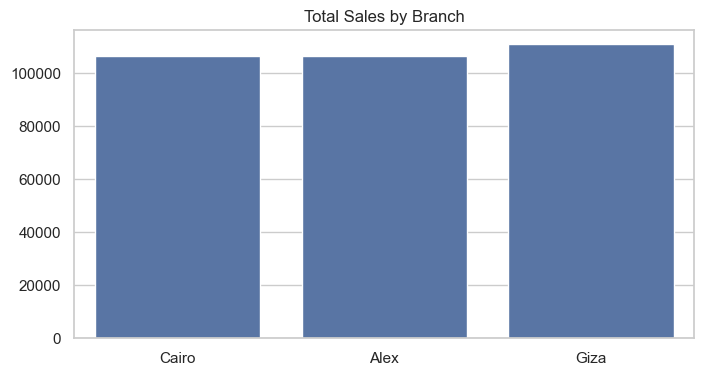

In [46]:
# --- Branch Performance ---
plt.figure(figsize=(8,4))
sns.barplot(x=df["Branch"].unique(), y=df.groupby("Branch")["Sales"].sum().values)
plt.title("Total Sales by Branch")
plt.show()

In [47]:
print("EDA COMPLETED!")

EDA COMPLETED!


In [48]:
df.to_csv("F:\\supermarket-sales-dashboard\\cleaned_supermarket_sales.csv", index=False)
print("Cleaned dataset exported as cleaned_supermarket_sales.csv")

Cleaned dataset exported as cleaned_supermarket_sales.csv
